# SAT / ACT Trends: Deep Dive into Participation and Performance by Geo

## Problem Statement

Participcation rates for the SAT have improved following the College Board's release of a new test format in March 2016. And while moderate gains in participation are welcome, there is still significant ground to gain in comparison to the ACT. For the remainder of this notebook, we'll deep dive into state level performance and participation to identify any optimization strategies that can help boost SAT participation.

## Executive Summary

#### Contents:

- [2017 Data Import & Cleaning](#2017-Data-Import-&-Cleaning)
- [2018 Data Import & Cleaning](#2018-Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Distributions and Correlation](#Distributions-and-Correlations)
- [Findings and Implications](#Findings-and-Implications)

#### Relevant Packages

In [1478]:
#Imports all the packages we need to conduct this deep dive 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
## 2017 Data Import & Cleaning

#### Read In SAT & ACT  Data


We'll start by reading in relevant `sat_2017.csv` and `act_2017.csv` files and assigning them to appropriately named pandas dataframes.

In [1479]:
#build a Dataframe out of our two ACT/SAT data sets by referencing their relative file paths
sat_df_17 = pd.read_csv('../data/sat_2017.csv')
act_df_17 = pd.read_csv('../data/act_2017.csv')

#### Displaying 2017 Data

With our data read into dataframe formats, let's use .head() and .shape to get a better understanding of what we're working with.

In [1480]:
#Start by taking a look at the top ten rows of our SAT data set
sat_df.head(10)

,state,participation,evidence_based_reading_and_writing,math,total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055
5,Colorado,11,606,595,1201
6,Connecticut,100,530,512,1041
7,Delaware,100,503,492,996
8,District of Columbia,100,482,468,950
9,Florida,83,520,497,1017


In [1481]:
#Now we can print the first ten rows of our ACT data set
act_df.head(10)

,state,participation,english,math,reading,science,composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2
10,Florida,73,19.0,19.4,21.0,19.4,19.8


In [1482]:
#How much data are we dealing with in our SAT dataframe?
sat_df_17.shape

(51, 5)

In [1483]:
#How much data are we dealing with in SAT dataframe?
act_df_17.shape

(52, 7)

#### At First Glance: 2017 Data

_SAT Dataframe_
- The SAT file appears to have columns "State," "Participation," "Evidence-Based Reading and Writing," "Math," and "Total."    
- Each row is indexed with a unique identified in the dataframe. State data is represented with strings; Participation data is represented as a percentage; the remaining columns are integer data.

_ACT Dataframe_
 - The ACT file appears to have columns "State," "Participation," "English," "Math," and "Reading," "Science," and "Composite. 
 - Each row is indexed with a unique identified in the dataframe. State data is represented with strings; Participation data is represented as a percentage; the remaining columns have decimals and as such appear to be float values.
 
 
<font color=gray>**NOTE**: It appears that the number of rows between these two datasets is inconsistent - we will want to dig into this later.</font>


#### Assessing Completeness of 2017 Data

We'll use the isnull() method which will return "True" for each data point in our dataframe when NaN values are detected. Because True is a boolean data type with value 1, we can then sum it. Based on this approach, both datasets don't appear to have any null values.

In [1484]:
#Sum the number of null entries in each data set 
sat_null_total = sat_df_17.isnull().sum().sum()
act_null_total = act_df_17.isnull().sum().sum()

#Use fprint to format our results for each particular data set
print (f"\nSAT Data Set Null Values: {sat_null_total}. \nACT Data Set Null Values: {act_null_total}.")


SAT Data Set Null Values: 0. 
ACT Data Set Null Values: 0.


#### Data Issue Identification and Modifcation

##### <font color=red>Issue 1: Datatypes</font>
##### <font color=red>Issue 1a: SAT/ACT 'Participation' Columns</font>

To better understand if there are issues with the data, we can take a look at .dtypes to ensure that columns we expect to house numerical values are in fact expressed numerically in our dataframes.

In [1485]:
#Print the datatypes for each respective column of SAT data set and ACt data set
print (f"SAT DF Data Types: \n{sat_df_17.dtypes}\n\nACT DF Data Types\n{act_df_17.dtypes}")

SAT DF Data Types: 
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT DF Data Types
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


While most of our columns have data types consistent with our expectations, the 'Participation' column in the SAT data is of type 'object.' Indeed, based on our earlier head() method call, we know that there is a  special character ('%') in this column that will prevent us from treating this as a numeric column. In order to address this, we can build a function that will allow us to strip out this character.

In [1486]:
#Build a function that takes in a df, column name, and character. It will remove the character.
#Then, take that series and cast as int

def manual_strip_to_numeric(dataframe, col_name, character):
    dataframe.loc[:,col_name] = dataframe.loc[:,col_name].str.replace(character, '')
    dataframe.loc[:,col_name] = dataframe.loc[:,col_name].apply(pd.to_numeric)


#Take the Participation column for each df, and remove the character '%'
manual_strip_to_numeric(sat_df_17, 'Participation','%')
manual_strip_to_numeric(act_df_17, 'Participation','%')

#check if the data type has changed for the column
print(sat_df_17.loc[:,'Participation'].dtype)
print(act_df_17.loc[:,'Participation'].dtype)

int64
int64


The data type has changed, so we can move forward.

##### <font color=red>Issue 1b: ACT 'Composite' Column</font>

The 'Composite' column of the ACT data set also appears to have issues preventing it from being treated nurmerically. It is currently of type 'object.' Let's find those characters and remove them to ensure this column can become of type float, consistent with other numeric columns in this data set.

In [1487]:
#What row is showing an issue in the 'Composite' column?
act_df_17[act_df_17['Composite'].str.contains('[A-Za-z]')]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [1488]:
#Wyoming has an 'X' in it's 'Composite' value, let's strip that out.
act_df_17.loc[act_df_17['State'] == 'Wyoming', 'Composite'] = 20.2;

#Check for new Wyoming Composite value
act_df_17.loc[act_df_17['State'] == 'Wyoming', 'Composite']

51    20.2
Name: Composite, dtype: object

In [1489]:
#This has fixed our specific value issue, but now we need to ensure that the column is cast as type float
act_df_17.loc[:,'Composite'] = act_df_17.loc[:,'Composite'].apply(pd.to_numeric);

#Check again for our data types to ensure the change was enacted
act_df_17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### <font color=red>Issue 2: Column Names</font>

Let's take another look at the column names for each data set. We notice that the ACT data set has no significant issues with respect to formatting. However, there are special characters present in the SAT column names. In addition to this, because we'll be merging data sets, we will also want these column names to be more descriptive to designate SAT/ACT, and 2017/2018. Through this process, we'll want to leverage lower case letters and underscores where spaces are needed for consistency.

In [1490]:
#Print out column names for each dataframe
print(sat_df_17.columns, "\n\n", act_df_17.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object') 

 Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


In [1491]:
#use rename() method on our dataframe to map new, more descriptive column names for both SAT and ACT.
#To apply without reassignment keep inplace=True as parameter
sat_df_17.rename(columns={
    'State': 'sat_state_17',
    'Evidence-Based Reading and Writing': 'sat_ebrw_17',
    'Participation': 'sat_participation_17',
    'Math': 'sat_math_17',
    'Total': 'sat_total_17',}, inplace=True)

act_df_17.rename(columns={
    'State': 'act_state_17',
    'Participation': 'act_participation_17',
    'English': 'act_english_17',
    'Math': 'act_math_17',
    'Reading': 'act_reading_17',
    'Science': 'act_science_17',
    'Composite': 'act_composite_17',}, inplace=True)

##### <font color=red>Issue 3: Fixing invalid SAT Math Scores</font>

In [1492]:
#Let's print out the Max and Min values for each section of the ACT data set
act_df_17.describe().loc[['min', 'max']]

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
min,8.0,16.3,18.0,18.1,2.3,17.8
max,100.0,25.5,25.3,26.0,24.9,25.5


In [1493]:
#Let's print out the Max and Min values for each section of the SAT data set
sat_df_17.describe().loc[['min', 'max']]

,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
min,2.0,482.0,52.0,950.0
max,100.0,644.0,651.0,1295.0


In researching the min and max values for SAT and ACT scores, we see some strange values for our SAT Math max, and our ACT Science minimum. Additional research demonstrates that ACT sections are graded on a scale of 1-36, so a score of 2 is not unheard of. However, the minimum score possible for the SAT Math section is 200. Diving into this further, we realize that the value 52 could be representative of a "Raw Score", and that the weighted corresponding score here is 730. So let's replace for that score accordingly. 
 

(Sources: [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))

In [1494]:
#Which state is demonstrating a lower than anticipated min?
sat_df_17.loc[sat_df_17['sat_math_17'] == 52, 'sat_state_17']

#Let's make an assumption that Maryland's SAT Math score was reported as raw, and adjust accordingly.
sat_df_17.loc[sat_df_17['sat_state_17'] == 'Maryland', 'sat_math_17'] = 730

#let's check that this update went through
print(sat_df_17.loc[sat_df_17['sat_state_17'] == 'Maryland', 'sat_math_17'])

20    730
Name: sat_math_17, dtype: int64


##### <font color=red>Issue 4: 'State' Values</font>

Let's pull out the 'National' row given that this is not a valid state, and is not present in the SAT dataframe

In [1495]:
#Drop 'National' from 'State' column for ACT data set
act_df_17 = act_df_17[act_df_17['act_state_17'] != 'National']

#Check to make sure this worked by seeing how many columns have 'State' == 'National'
act_df_17[act_df_17['act_state_17']=='National'].sum().sum()

0.0

#### Defining Data Dictionaries

Our data has been fixed, and now we'll create a data dictionary for reference for both of our data sets.


SAT Data Dictionary:

|Feature|Type|Description|
|---|---|---|
|sat_state_17|object|U.S. state name| 
|sat_participation_17|int64|Corresponding participation rate| 
|sat_ebrw_17|int64|score for specific EBRW SAT section| 
|sat_math_17|int64|score for specific math SAT section| 
|sat_total_17|int64|combined score for SAT| 


ACT Data Dictionary:

|Feature|Type|Description|
|---|---|---|
|act_state_17|object|U.S. state name| 
|act_participation_17|int64|Corresponding participation rate| 
|act_english_17|float64|score for specific English ACT section| 
|act_math_17|float64|score for specific Math ACT section| 
|act_reading_17|float64|score for specific Reading ACT section|
|act_science_17|float64|score for specific Science ACT section| 
|act_composite_17|float64|Composite ACT score combining all sections| 


#### Merge and Save 2018 Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable. We will then read in the .csv files into new dataframes.

In [1496]:
sat_act_17_df = sat_df_17.merge(act_df_17,how="outer",left_on=['sat_state_17'],right_on=['act_state_17'])

In [1497]:
sat_act_17_df.head()

,sat_state_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_state_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5,593,572,1165,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,California,31,22.5,22.7,23.1,22.2,22.8


In [1498]:
sat_act_17_df.to_csv('../data/sat_act_17.csv')

***
## 2018 Data Import & Cleaning

We have taken care of our 2017 ACT/SAT data. Now let's move into our 2018 data sets, starting by reading in our files and building new data frames

In [1499]:
#Build Dataframes out of our two ACT/SAT data sets by referencing their relative file paths
sat_df_18 = pd.read_csv('../data/sat_2018.csv')
act_df_18 = pd.read_csv('../data/act_2018.csv')

#let's take a look at SAT 2018
sat_df_18.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [1500]:
#let's take a look at ACT 20118
act_df_18.head(3)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2


#### Identifying Data Issues and Fixing Them for 2018 Dataset

##### <font color=red>Check 1: SAT/ACT Datatypes for 'Participation' Columns</font>

Recall this was an issue with the 2017 datasets. A quick glance at datatype shows that we are dealing with the same issue-- 'Participation' columns are being treated as 'Object' types. We need to convert these to numeric values and be consistent with how we cast them (we will use type 'int64).

In [1501]:
#Let's look at the data types for each data set to see if the sme issues persist
print (f"SAT DF Data Types: \n{sat_df_18.dtypes}\n\nACT DF Data Types\n{act_df_18.dtypes}")

SAT DF Data Types: 
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT DF Data Types
State             object
Participation     object
Composite        float64
dtype: object


In [1502]:
#Take the Participation column and remove the character '%'
manual_strip_to_numeric(sat_df_18, 'Participation', '%')
manual_strip_to_numeric(act_df_18, 'Participation', '%')

#check if the data type has changed for the column
print(sat_df_18.loc[:,'Participation'].dtype)
print(act_df_18.loc[:,'Participation'].dtype)

int64
int64


The data type has changed, so we can move forward and check other potential pitfalls with this dataset.

##### <font color=red>Check 2: SAT Math Scores</font>

In our 2017 dataset, there was a raw score recorded for one state. We'll start by assessing min/min score values to see if there are any outliers that need addressing.

In [1503]:
#Let's print out the Max and Min values for each section of the ACT data set
act_df_18.describe().loc[['min', 'max']]

,Participation,Composite
min,7.0,17.7
max,100.0,25.6


In [1504]:
#Let's print out the Max and Min values for each section of the SAT data set
sat_df_18.describe().loc[['min', 'max']]

,Participation,Evidence-Based Reading and Writing,Math,Total
min,2.0,480.0,480.0,977.0
max,100.0,643.0,655.0,1298.0


There do not appear to be any significant outliers and all values are within expected score ranges based on our previous research.

##### <font color=red>Check 3: State values for data sets</font>

In our 2017 data set, there was a state recorded as 'National.' Let's see if this has carried into 2018. If so, we will need to address.

In [1505]:
#Let's print out the Max and Min values for each section of the SAT data set
print(act_df_18['State'].shape)
print(sat_df_18['State'].shape)
print("\n")

#It looks like there is a stray row in our ACT data set. Let's look at value_counts() by state to assess.
sat_df_18['State'].value_counts();
act_df_18['State'].value_counts();

#Maine appears to have multiple entries. A quick check reveals they are duplicates so let's drop one
print(act_df_18.loc[act_df_18['State'] == 'Maine',:])

#Let's drop a duplicate by referencing index
act_df_18.drop(19, inplace=True)

(52,)
(51,)


    State  Participation  Composite
19  Maine              7       24.0
20  Maine              7       24.0


In [1506]:
#Confirming that we only have one entry now for Maine
act_df_18.loc[act_df_18['State'] == 'Maine',:]

,State,Participation,Composite
20,Maine,7,24.0


Are there any other issues? When we look at 'State' values for the ACT data set, we notice that capitalization is off for "District of colombia". Let's resolve this.

In [1507]:
#Assess individual values for 'State' and their frequencies across data sets
act_df_18['State'].value_counts();
sat_df_18['State'].value_counts();

#Adjust our state value for ACT data set for D.C.
act_df_18.loc[act_df_18['State']=='District of columbia','State'] = 'District of Columbia'

#check that our change when through strikes again. This will return the number of columns with our incorrect 'State' value
print(act_df_18.loc[act_df_18['State']=='District of columbia','State'].sum())

0


##### <font color=red>Check 3: Adjust column names</font>

It's possible that having spaces in the column name for 'Evidence-Based Reading and Writing' will produce issues when referencing it later, so it's best to replace spaces with underscores. While we're at it, let's also make all of our column entries lowercase for ease of reference moving forward. Finally, similar to what we did with our first data sets, let's add some descriptors to indicate the test and year

In [1508]:
#use rename() method on our dataframes to map a new column name to the column of interest. 
#To apply without reassignment keep inplace=True as parameter
sat_df_18.rename(columns={
    'State': 'sat_state_18',
    'Evidence-Based Reading and Writing': 'sat_ebrw_18',
    'Participation': 'sat_participation_18',
    'Math': 'sat_math_18',
    'Total': 'sat_total_18',}, inplace=True)

act_df_18.rename(columns={
    'State': 'act_state_18',
    'Participation': 'act_participation_18',
    'Composite': 'act_composite_18',}, inplace=True)


In [1509]:
#Do a quick check of every column to make sure that names are different
print(f"\n{sat_df_17.columns}\n\n{act_df_17.columns}")
print(f"\n{sat_df_18.columns}\n\n{act_df_18.columns}")


Index(['sat_state_17', 'sat_participation_17', 'sat_ebrw_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

Index(['act_state_17', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

Index(['sat_state_18', 'sat_participation_18', 'sat_ebrw_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

Index(['act_state_18', 'act_participation_18', 'act_composite_18'], dtype='object')


#### Merging 2017 and 2018 into a single Dataframe
We will combine the data we have read in so far into a singular dataframe. Because each dataframe has a State column, and because each of these columns has been cleaned/verified, we can proceed. We will save this to 'final.csv'

In [1510]:
#Merge our 2018 data sets together
sat_act_18_df = sat_df_18.merge(act_df_18,how="outer",left_on=['sat_state_18'],right_on=['act_state_18'])

#Merger 2018 and 2017 into one combined data set of 20 columns
final_df = sat_act_17_df.merge(sat_act_18_df,how="outer",left_on=['sat_state_17'],right_on=['sat_state_18'])

In [1511]:
#Check shape
final_df.shape

(51, 20)

In [1512]:
#Write this fully combined dataframe out to 'final.csv'
final_df.to_csv('../data/final.csv')

After combining, we have a number of 'State' columns. Let's prioritize one of these columns and drop the rest.

In [1513]:
#We have several state columns so let's rename one  state column to be our primary state column.
final_df.rename(columns={
    'sat_state_17': 'state'}, inplace=True)

#...And let's drop the rest of the state columns
final_df = final_df.drop(['act_state_17', 'sat_state_18', 'act_state_18'], axis= 1)

#Verify our changes
final_df.columns

Index(['state', 'sat_participation_17', 'sat_ebrw_17', 'sat_math_17',
       'sat_total_17', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17',
       'sat_participation_18', 'sat_ebrw_18', 'sat_math_18', 'sat_total_18',
       'act_participation_18', 'act_composite_18'],
      dtype='object')

***
## Exploratory Data Analysis


#### Summary Statistics
We'll transpose our .describe() call to get a better view of our summary statistics by feature.

In [1514]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ebrw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,560.921569,52.740437,468.0,523.50,551.0,603.50,730.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Looking at our summary statistics, we have the mean by feature to help us understand the center of our data; std (standard deviation) helps us to assess data spread. Min/Max output indicates the overall range for our data. Notice that the standard deviations here for participation across both ACT and SAT tests increase from 2017 to 2018. This is interesting an may point to the fact that state to state regulations have changed which are impacting participation rates to a greater degree. We'll need to conduct outside research to validate this idea.

In [1515]:
#Build a function to replicate np.std() functionality
def standard_deviation(n,series,mean):
    return(np.sqrt((1/(n-1))*sum((series-mean)**2)))

We'll use our manually-created standard deviation formula to apply it across our relevant features. We'll assign the output of this to 'sd' and will accomplish this through dict comprehension.
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [1516]:
#Dictionary comprehension to build a dictionary of standard deviations for each of our numeric columns
sd = { category : standard_deviation(category_values['count'],final_df[category],category_values['mean'])
      for category,category_values in final_df.describe().items()}

Our standard_deviation manual values look to be in alignment with those via the describe() method so let's move forward with our analysis.

#### Deep Dive: SAT Participation Rates

In [1517]:
#Let's get a general sense of participation rates for the SAT, by year
final_df.describe().T.loc[['sat_participation_17','sat_participation_18'],['min', 'mean','max']]

,min,mean,max
sat_participation_17,2.0,39.803922,100.0
sat_participation_18,2.0,45.745098,100.0


In [1518]:
#What is the YoY change in mean?
(final_df.describe().T.loc['sat_participation_18','mean'] / final_df.describe().T.loc['sat_participation_17','mean'] - 1) * 100


14.926108374384217

In [1519]:
#Find SAT '17 participation rates and isolate for top states. Let's also inlude total scores
final_df[['state','sat_participation_17', 'sat_total_17']].sort_values(by='sat_participation_17', ascending=False).head()

,state,sat_participation_17,sat_total_17
8,District of Columbia,100,950
22,Michigan,100,1005
6,Connecticut,100,1041
7,Delaware,100,996
29,New Hampshire,96,1052


In [1520]:
#Find SAT '18 participation rates and isolate for top states. Let's also inlude total scores
final_df[['state','sat_participation_18', 'sat_total_18']].sort_values(by='sat_participation_18', ascending=False).head()

,state,sat_participation_18,sat_total_18
5,Colorado,100,1025
6,Connecticut,100,1053
7,Delaware,100,998
22,Michigan,100,1011
12,Idaho,100,1001


In [1521]:
#Find SAT '17 participation rates and isolate for bottom states. Let's also inlude total scores
final_df[['state','sat_participation_17', 'sat_total_17']].sort_values(by='sat_participation_17', ascending=True).head(6)

,state,sat_participation_17,sat_total_17
34,North Dakota,2,1256
24,Mississippi,2,1242
15,Iowa,2,1275
25,Missouri,3,1271
44,Utah,3,1238
41,South Dakota,3,1216


In [1522]:
#Find SAT '18 participation rates and isolate for bottom states. Let's also inlude total scores
final_df[['state','sat_participation_18', 'sat_total_18']].sort_values(by='sat_participation_18', ascending=True).head(6)

,state,sat_participation_18,sat_total_18
34,North Dakota,2,1283
50,Wyoming,3,1257
41,South Dakota,3,1240
27,Nebraska,3,1252
49,Wisconsin,3,1294
24,Mississippi,3,1236


Findings:
 - Looking at SAT participation rates for 2017 and 2018, we can see that average participation did increase YoY (from ~40% to 46% respectively). **Connecticut, Delware, District of Columbia and Michigan** are among some of the top states by participation. Conversely, **the Dakotas and Mississipi** are among some of states that show the lowest SAT participation rates.  
 - This is interesting because it suggests a larger trend of Great Plains states showing low participation rates, and Midwest/East Coast states having strong participation rates. One hypothesis for this trend is that high school participation rates / college entry rates are lower in the Great Plains states compared to national averages. 
 - Also interesting is the fact that scores appear to be inversely correlated to participation rates

#### Deep Dive: ACT Participation Rates

In [1523]:
#Let's get a general sense of participation rates for the ACT, by year
final_df.describe().T.loc[['act_composite_17','act_composite_18'],['min', 'mean','max']]

,min,mean,max
act_composite_17,17.8,21.519608,25.5
act_composite_18,17.7,21.496078,25.6


In [1524]:
#What is the YoY change in mean?
(final_df.describe().T.loc['act_composite_18','mean'] / final_df.describe().T.loc['act_composite_17','mean'] - 1) * 100


-0.10933940774487949

In [1525]:
#Find ACT '17 participation rates and isolate for top states
final_df[['state','act_participation_17']].sort_values(by='act_participation_17', ascending=False).head(10)

,state,act_participation_17
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


In [1526]:
#Find ACT '18 participation rates and isolate for top states
final_df[['state','act_participation_18']].sort_values(by='act_participation_18', ascending=False).head(10)

,state,act_participation_18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


In [1527]:
#Find ACT '17 participation rates and isolate for bottom states
final_df[['state','act_participation_17']].sort_values(by='act_participation_17', ascending=True).head(5)

,state,act_participation_17
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


In [1528]:
#Find ACT '18 participation rates and isolate for bottom states
final_df[['state','act_participation_18']].sort_values(by='act_participation_18', ascending=True).head(5)

,state,act_participation_18
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


Findings:
 - Looking at overall participation rates for the ACT, in contrast to YoY SAT trends, the test has seen a decline participation rates (dipping from 65% to 62%). However, overall participation for this test remains firmly higher on average than the SAT (~60% compared to 45%). 
 - State level ACT participation data exhibits a couple of interesting features. First, there are a **high number of 100% ACT participation states**-- this may suggest that there are state level requirements/regulations in place for the test, or that colleges in these states require the ACT. 
 - Second, the geographical spread of states exhibiting high participation is significant (**Alabama, Ohio, Nevada, for example**), while low participation states appear to be somewhat concentrated in the East Coast / New England area (**Maine, New Hampshire, Delawara, Rhode Island**). Maine, in particular, shows the lowest participation rate here. This is likely a product of state to state requirements as it relates to testing regimens.

#### States by Highest SAT Total

In [1529]:
#Find SAT '17 Total values and isolate for top states
final_df[['state','sat_total_17']].sort_values(by='sat_total_17', ascending=False).head()

,state,sat_total_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [1530]:
#Find SAT '18 Total values and isolate for top states
final_df[['state','sat_total_18']].sort_values(by='sat_total_18', ascending=False).head()

,state,sat_total_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


#### States by Highest ACT Total

In [1531]:
#Find ACT '17 Total values and isolate for top states
final_df[['state','act_composite_17']].sort_values(by='act_composite_17', ascending=False).head()

,state,act_composite_17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [1532]:
#Find ACT '18 Total values and isolate for top states
final_df[['state','act_composite_18']].sort_values(by='act_composite_18', ascending=False).head()

,state,act_composite_18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


Findings

 - In looking at top SAT Total and ACT composite scores at the geo level, we notice that a couple of interesting trends emerge which are inconsistent with trends we've seen so far. Top Total SAT score states are predominately in the Great Plains / Midwest (**Minnesota, Wisconsin, Iowa, Kansas**), while Top ACT score states are in the **New England Area**. This runs counter to participation rates. 
 - This suggests that users taking these tests in states that don't require the test are **college-bound, high-performing** students who are taking these tests to bolster their applications. In other words, **there should be a *negative correlation between participation rate and total/composite score.**

#### States Exhibiting Major Swings in SAT Participation

In [1629]:
#Let's take a look at states who saw swings in participation rate for the SAT YoY
final_df['sat_participation_change']=final_df['sat_participation_18'] - final_df['sat_participation_17']
final_df.sort_values('sat_participation_change',ascending=False)[['state','sat_participation_17','sat_participation_18','sat_participation_change']].head(23)

,state,sat_participation_17,sat_participation_18,sat_participation_change
13,Illinois,9,99,90
5,Colorado,11,100,89
39,Rhode Island,71,97,26
48,West Virginia,14,28,14
30,New Jersey,70,82,12
32,New York,67,79,12
10,Georgia,61,70,9
12,Idaho,93,100,7
20,Maryland,69,76,7
4,California,53,60,7


This table is interesting, it seems to suggest there are two types of states seeing growth in SAT participation rates -- those with the SAT already established in that state, and those without. Let's select a handful of states representing each of these groups.

#### States of Interest: Colorado, Ohio, West Virgnia, Virginia

These states are interesting for different reasons. **Colorado** is one of several stats who saw a complete swing in participation (11% to 100%), likely due to regulation. **West Virginia** is a state who saw their participation rate double, though it still remains low (12% to 24%), signifying a different circumstance. **Virgnia** is a state that is at the bottom of our list above, however it exhibits a strong participation rate from the beginning (65% to 68%) -- what could be the reason? Finally, Ohio is just a fantastic state. I'm from Ohio, so let's also check that out

Some outside research revealed the following information regarding these patterns:
 
 
  - **Colorado**: This state began requiring students to take the SAT starting in Spring 2017, thus the jump to 100% compliance starting in 2018 
    - <font color=gray>Source: https://www.chalkbeat.org/posts/co/2019/08/15/sat-scores-are-slightly-down-colorado-find-your-schools-2019-results/)</font>
    
    
  - **Ohio**: Starting in 2017, high schools were officially required to give either the SAT or ACT. This is why we see a boost in participation rates in both SAT and ACT categories
    - <font color=gray>Source: https://radio.wosu.org/post/some-students-ohios-college-testing-requirement-gets-pass#stream/0)</font>
    
    
  - **West Virginia**: SAT participation rates doubled from 2017 to 2018, and this is in large part due to House Bill 2711 which established the SAT as the statewide standardized test.
    - <font color=gray>Source: https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for/article_b60d2618-4943-56f6-b180-4b4442172ef8.html)</font>
    
    
  - **Virginia**: Virginia is interesting, as this is a state which saw modest gains in participation rate. This was in part due to state efforts to bolster family outreach, focusing on education around test requirements. This is an indirect method to consider when thinking about strategies to boost performance
    - <font color=gray>Source: https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf</font>


**Strategy Implications**: In all cases, the strategy the College Board has taken in these states may be effective in other, similar states. Strategy should be adjusted according to the participation rates exhibited by each state. As established by Hanover Research, indirect methods (community outreach, staff training, career-readiness training) are effective long term growth strategies that may be leveraged in areas where the SAT is already established. For states with ACT preference, because that preference is often guided by existing state wide regulation / contracts, developing priority states based on estimated revenue and contract expiration may be the most effective approach.


   - <font color=gray>Source: https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf</font>

***
## Distributions and Correlations

Now that we have an initial understanding of our data, let's dive deeper using visualization. We'll assess our combined dataframe using the following methods:

 - Correlation heatmaps to understand any relationships between features
 - Histograms to understand deeper distributions of our features
 - Boxplots to understand key statistics against our features, and across our features.


In [1549]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 15) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States')
        ax[i].vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = 17.5, color = 'r', label='mean');
        #ax[i].vlines(x = np.median(dataframe[column]), ymin = 0, ymax = 17.5, color = 'orange', label='median');

#### Visualizing Data Distribution by Year, Test

We'll now look to get a better sense of data spread across our features. We'll focus on Participation Rates, Math scores, and Reading scores.

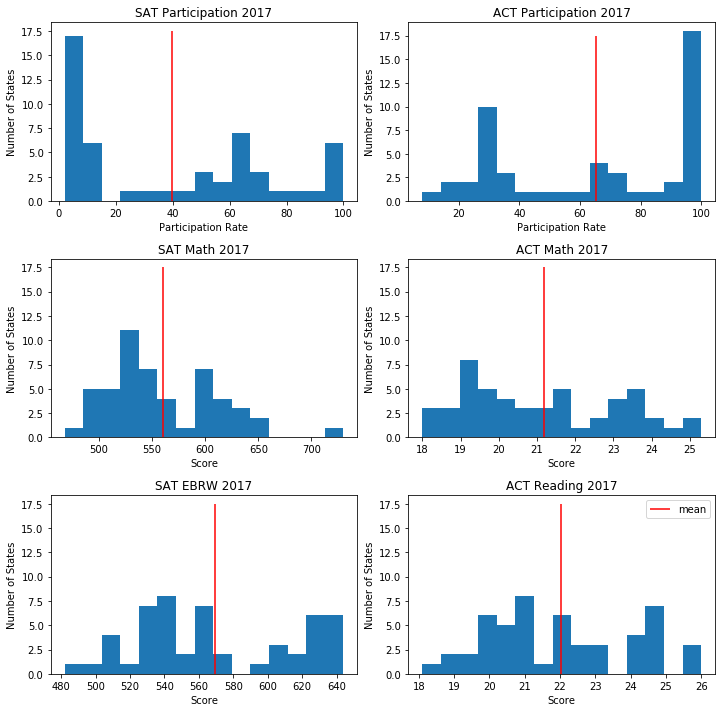

In [1552]:
#Call the subplot function and pass in the columns of interest-- Participation, Math, Reading across tests for 2017
subplot_histograms(
    final_df,
    ['sat_participation_17',
     'act_participation_17', 
     'sat_math_17', 
     'act_math_17', 
     'sat_ebrw_17', 
     'act_reading_17'],
    ['SAT Participation 2017',
     'ACT Participation 2017',
     'SAT Math 2017', 
     'ACT Math 2017', 
     'SAT EBRW 2017', 
     'ACT Reading 2017'],
    ['Participation Rate', 
     'Participation Rate', 
     'Score', 
     'Score', 
     'Score', 
     'Score'],
    )

#Ensure layout is clean when we display in notebook
plt.tight_layout()
plt.legend()

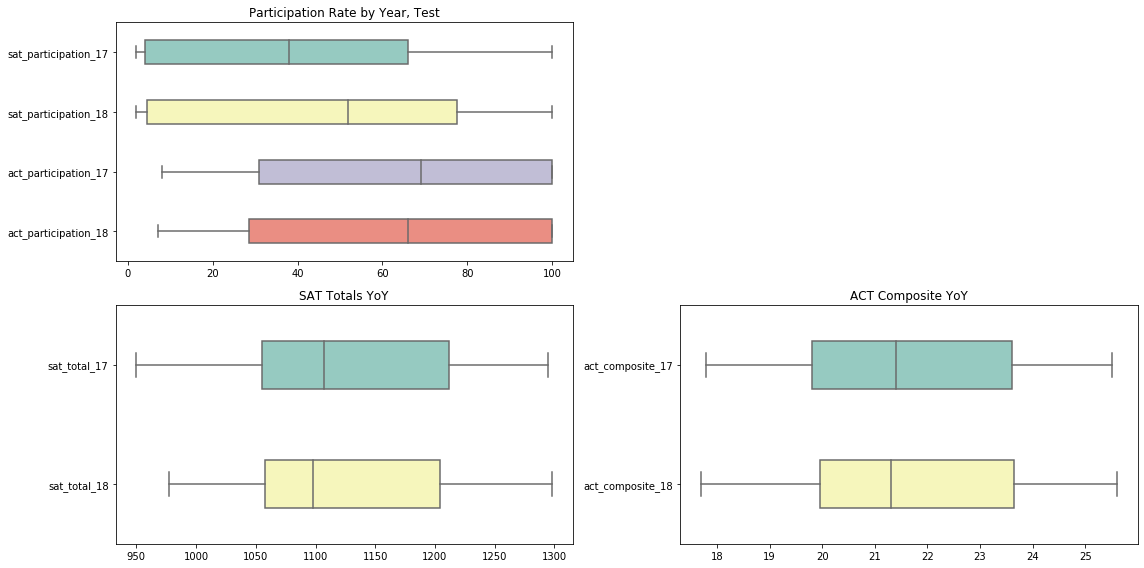

In [1538]:
#Build figure space for boxplots
plt.figure(figsize=(16, 8))

#Isolate the columns of choice we'd like to visualize
boxplot_participation_df = final_df[['sat_participation_17',
                       'sat_participation_18',
                       'act_participation_17',
                       'act_participation_18']]

boxplot_sattotal_df = final_df[['sat_total_17',
                       'sat_total_18',]]

boxplot_actcomp_df = final_df[['act_composite_17',
                       'act_composite_18',]]

#Build boxplots
plt.subplot(2,2,1)
sns.boxplot(data=boxplot_participation_df, width=0.4, orient='h', palette = 'Set3').set(xlabel='',title='Participation Rate by Year, Test')
plt.subplot(2,2,3)
sns.boxplot(data=boxplot_sattotal_df, width=0.4, orient='h', palette = 'Set3').set(xlabel='',title='SAT Totals YoY')
plt.subplot(2,2,4)
sns.boxplot(data=boxplot_actcomp_df, width=0.4, orient='h', palette = 'Set3').set(xlabel='',title='ACT Composite YoY')

#Ensure layout is clean when we display in notebook
plt.tight_layout()

Findings
- *Overall*: Looking at our histograms for scores (total, subscores, and participation rates) the distributions appear to be non-normal with some appearing bimodal in nature. 
- *Participation Rates*: You can see from the boxplots above that the mean participation rates for SAT in 2017 and 2018 continue to lag 2017 and 2018 ACT scores. This is consistent with what we've seen so far. The IQRs for each respective test are similar in size.
- *Total Scores*: the SAT mean total score has declined slightly YoY, which is likely a function of improving participation rates. Notice too how the whiskers and IQR have shrunk YoY. Conversely, ACT has seen minimal variation year over year.

#### Correlation Across Features

We have a stronger understanding of what each feature looks like. Let's now take a look at relationships across features to glean any relevant insights. We will start with a correlation heatmap,  then transition into scatterplots to deep dive into specific states.

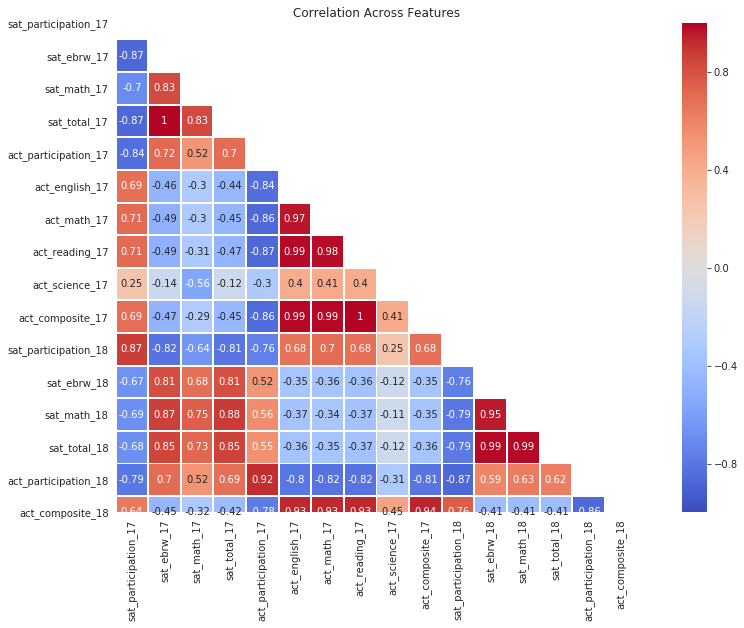

In [1539]:
#Build figure space
plt.figure(figsize=(16,9))

#Generate correlations across our features
corr = final_df.corr()

#Set up a white upper triangle to mask our repeating data
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Put it all together and use the coolwarm cmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, square=True, annot=True, vmin=-1, vmax=1, linewidths=.9, cmap='coolwarm').set_title("Correlation Across Features")

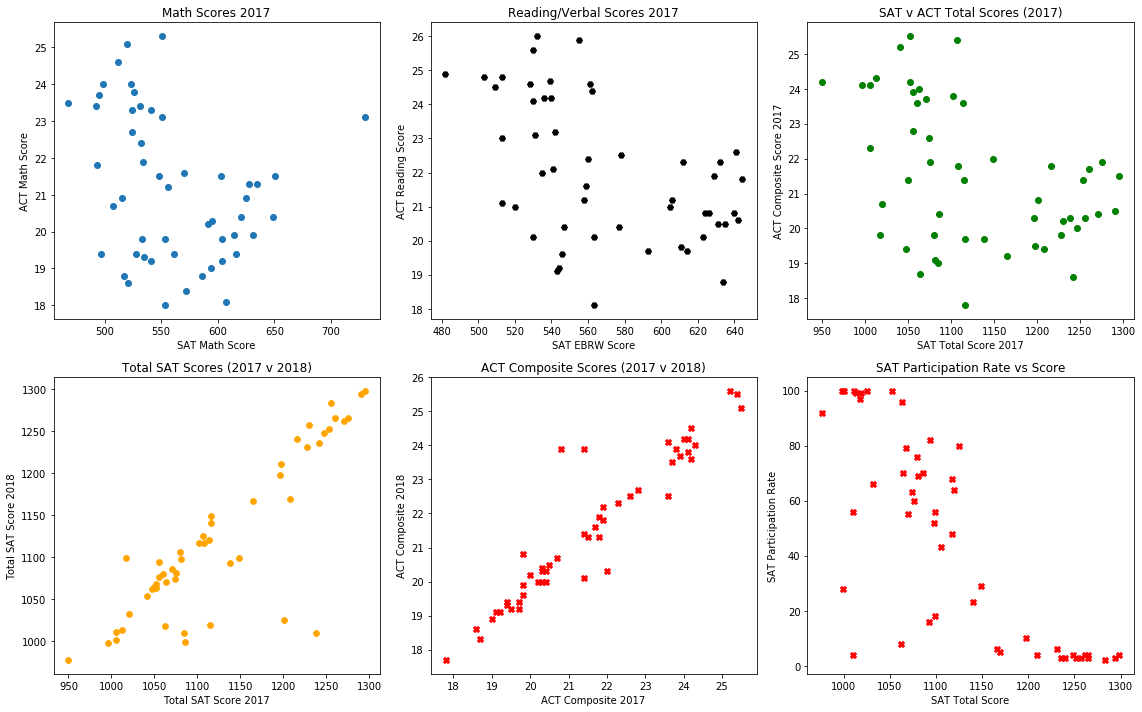

In [1540]:
# Establish the size of the figure.
plt.figure(figsize=(16, 10))

#Build your plotting space, and reference the first plot
plt.subplot(2,3,1)

#Create scatterplot for Math Scores
plt.scatter(final_df['sat_math_17'],
            final_df['act_math_17']);
plt.title("Math Scores 2017")
plt.ylabel("ACT Math Score", fontsize = 10)
plt.xlabel("SAT Math Score", fontsize = 10)

#On to the next subplot
plt.subplot(2,3,2)


#Create scatterplot for Reading/Verbal
plt.scatter(final_df['sat_ebrw_17'],
            final_df['act_reading_17'], marker="H", c='black');
plt.title("Reading/Verbal Scores 2017")
plt.ylabel("ACT Reading Score", fontsize = 10)
plt.xlabel("SAT EBRW Score", fontsize = 10)

#On to the next subplot
plt.subplot(2,3,3)

#Create scatterplot for Total Scores 2017 ACT v SAT
plt.scatter(final_df['sat_total_17'],
            final_df['act_composite_17'], marker="o", c='green');
plt.title("SAT v ACT Total Scores (2017)")
plt.ylabel("ACT Composite Score 2017", fontsize = 10)
plt.xlabel("SAT Total Score 2017", fontsize = 10)

#On to the next subplot
plt.subplot(2,3,4)

#Create scatterplot for SAT Totals 2017 v 2018
plt.scatter(final_df['sat_total_17'],
            final_df['sat_total_18'], marker="8", c='orange');
plt.title("Total SAT Scores (2017 v 2018)")
plt.ylabel("Total SAT Score 2018", fontsize = 10)
plt.xlabel("Total SAT Score 2017", fontsize = 10);

#On to the next subplot
plt.subplot(2,3,5)

#Create scatterplot for ACT Composite 2017 v 2018
plt.scatter(final_df['act_composite_17'],
            final_df['act_composite_18'], marker="X", c='red');
plt.title("ACT Composite Scores (2017 v 2018)")
plt.ylabel("ACT Composite 2018", fontsize = 10)
plt.xlabel("ACT Composite 2017", fontsize = 10);

#On to the next subplot
plt.subplot(2,3,6)

#Create scatterplot for ACT Composite 2017 v 2018
plt.scatter(final_df['sat_total_18'],
            final_df['sat_participation_18'], marker="X", c='red');
plt.title("SAT Participation Rate vs Score")
plt.ylabel("SAT Participation Rate", fontsize = 10)
plt.xlabel("SAT Total Score", fontsize = 10);

#Make some tweaks to ensure our layout looks good
plt.tight_layout()

We notice a few interesting trends from these scatterplots - 
 - **Participation Rates vs Totals (From grid plot):** For both tests and years, you can see that participation does not correlate with test performance.
  - 2017 SAT Participation vs SAT Score Correlation: **-0.87**
  - 2017 ACT Participation vs SAT Score Correlation: **-0.86**
  - 2018 SAT Participation vs SAT Score Correlation: **-0.79**
  - 2018 ACT Participation vs SAT Score Correlation: **-0.86**
  
  
 - **SAT Totals v ACT Totals (from scatterplots)**: Correlation between totals are moderately negative in a number of areas, likely a result of states prioritizing one test over the other.
  - 2017 SAT Math vs ACT Math Correlation: **-0.30**
  - 2017 SAT Total vs ACT Composite Correlation: **-0.45**
  
The extremely negative correlation between participation and score is interesting for the SAT -- can we unpack this further? Let's leverage seaborn to overlay the % change in participation rate YoY.
  

## Findings and Implications

#### Findings
 - Overall, the **SAT has seen growth in participation** without any major disruption to average total score. However, it still **pales in comparison to the ACT** which has seen significant adoption over the last 10-15 years.
 - **Participation rates and total scores are inversely correlated.** This means that students taking the SAT/ACT in low participation states are high achieving and boost the score. Conversely, where the SAT/ACT is required, students who may not have college aspirations are also taking it, pulling down the average total score
 - **Participation rates are largely impacted by existing and upcoming state level agreements/law** which prioritize either the SAT or ACT as the statewide standardized test of choice. 
 - In addition to this, we see strong **regional preference** between these tests. The Great Plain / Midwest / South prefer the SAT, while the New England / West Coast regions show ACT preference.
 - Participation can also be impacted by **non-direct efforts** such as community outreach and family education as it relates to college requirements.
  

#### Implications
 - Given goal of boosting participation and the fact that there is an **inverse relationship between participation and score**, work with College Board business development team to understand score targets for next 3-5 years.
 - Incorporate deeper view of participation rates at district level to identify problem areas.
 - Develop two-pronged strategic approach based on current participation rates by state. For states with high participation, consider **indirect methods** to boost participation. For states with low to zero participation, **monitor contract/bid opportunities**.
 - Overlay findings with **demographic data and estimated revenue** for College Board to prioritize state targets.
